CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


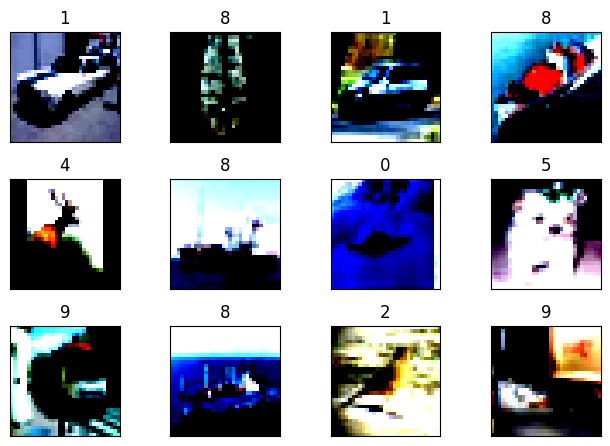

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import os
# os['KMP_DUPLICATE_LIB_OK']='True'
# CUDA?
cuda = torch.cuda.is_available()

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA Available?", cuda)
# Train data transformations

train_transforms = transforms.Compose([
    # transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    # transforms.Resize((28, 28)),
    # transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
    ])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
    ])

train_data = datasets.CIFAR10(
    root='./data', train=True, download=True, transform=train_transforms)
test_data = datasets.CIFAR10(
    root='./data', train=False, download=True, transform=test_transforms)

batch_size = 512
class_map = {
    'ZERO': 0,
    'ONE': 1,
    'TWO': 2,
    'THREE': 3,
    'FOUR': 4,
    'FIVE': 5,
    'SIX': 6,
    'SEVEN': 7,
    'EIGHT': 8,
    'NINE': 9
}
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}

test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

from utils import return_dataset_images

return_dataset_images(train_loader, 12)

In [3]:
!pip install torchsummary
from model import Net_LN,train, test, model_summary

use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = Net_LN().to(device)
model_summary(model, (3,32,32))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 30, 30]             432
              ReLU-2           [-1, 16, 30, 30]               0
         GroupNorm-3           [-1, 16, 30, 30]              32
           Dropout-4           [-1, 16, 30, 30]               0
            Conv2d-5           [-1, 20, 28, 28]           2,880
              ReLU-6           [-1, 20, 28, 28]               0
         GroupNorm-7           [-1, 20, 28, 28]              40
           Dropout-8           [-1, 20, 28, 28]               0
            Conv2d-9           [-1, 16, 28, 28]             320
        MaxPool2d-10           [-1, 16, 14, 14]               0
           Conv2d-11           [-1, 20, 14, 14]           2,880
             ReLU-12           [-1, 20, 14, 14]               0
    

In [4]:

optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
# scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min',factor=0.1, patience=7)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.02, epochs=15, steps_per_epoch=len(train_loader))
criterion = nn.CrossEntropyLoss()
num_epochs = 15

for epoch in range(1, num_epochs+1):
  # print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion,scheduler)
  test(model, device, test_loader)
  # scheduler.step(tl)

Loss=1.9005802869796753 Batch_id=97 Accuracy=19.89: 100%|██████████| 98/98 [00:19<00:00,  4.94it/s]



Test set: Average loss: 1.8353, Accuracy: 3168/10000 (31.68%)



Loss=1.4923689365386963 Batch_id=97 Accuracy=38.33: 100%|██████████| 98/98 [00:15<00:00,  6.18it/s]



Test set: Average loss: 1.4736, Accuracy: 4660/10000 (46.60%)



Loss=1.2967591285705566 Batch_id=97 Accuracy=49.97: 100%|██████████| 98/98 [00:14<00:00,  6.69it/s]



Test set: Average loss: 1.3025, Accuracy: 5252/10000 (52.52%)



Loss=1.0315451622009277 Batch_id=97 Accuracy=56.65: 100%|██████████| 98/98 [00:14<00:00,  6.69it/s]



Test set: Average loss: 1.1846, Accuracy: 5744/10000 (57.44%)



Loss=1.0470466613769531 Batch_id=97 Accuracy=60.61: 100%|██████████| 98/98 [00:14<00:00,  6.62it/s]



Test set: Average loss: 1.0468, Accuracy: 6309/10000 (63.09%)



Loss=1.0076032876968384 Batch_id=97 Accuracy=65.26: 100%|██████████| 98/98 [00:15<00:00,  6.34it/s]



Test set: Average loss: 0.9680, Accuracy: 6644/10000 (66.44%)



Loss=0.883836567401886 Batch_id=97 Accuracy=67.40: 100%|██████████| 98/98 [00:14<00:00,  6.56it/s]



Test set: Average loss: 0.9133, Accuracy: 6743/10000 (67.43%)



Loss=0.8969416618347168 Batch_id=97 Accuracy=69.73: 100%|██████████| 98/98 [00:14<00:00,  6.66it/s]



Test set: Average loss: 0.8676, Accuracy: 6968/10000 (69.68%)



Loss=0.8035191893577576 Batch_id=97 Accuracy=71.43: 100%|██████████| 98/98 [00:14<00:00,  6.61it/s]



Test set: Average loss: 0.8727, Accuracy: 6945/10000 (69.45%)



Loss=0.7543925046920776 Batch_id=97 Accuracy=72.99: 100%|██████████| 98/98 [00:14<00:00,  6.64it/s]



Test set: Average loss: 0.8020, Accuracy: 7196/10000 (71.96%)



Loss=0.7106581926345825 Batch_id=97 Accuracy=74.82: 100%|██████████| 98/98 [00:15<00:00,  6.51it/s]



Test set: Average loss: 0.7673, Accuracy: 7338/10000 (73.38%)



Loss=0.6529126167297363 Batch_id=97 Accuracy=76.36: 100%|██████████| 98/98 [00:14<00:00,  6.64it/s]



Test set: Average loss: 0.7535, Accuracy: 7407/10000 (74.07%)



Loss=0.5847738981246948 Batch_id=97 Accuracy=77.52: 100%|██████████| 98/98 [00:14<00:00,  6.65it/s]



Test set: Average loss: 0.7336, Accuracy: 7442/10000 (74.42%)



Loss=0.5944767594337463 Batch_id=97 Accuracy=78.87: 100%|██████████| 98/98 [00:15<00:00,  6.22it/s]



Test set: Average loss: 0.7253, Accuracy: 7472/10000 (74.72%)



Loss=0.5947925448417664 Batch_id=97 Accuracy=79.55: 100%|██████████| 98/98 [00:15<00:00,  6.13it/s]



Test set: Average loss: 0.7220, Accuracy: 7498/10000 (74.98%)



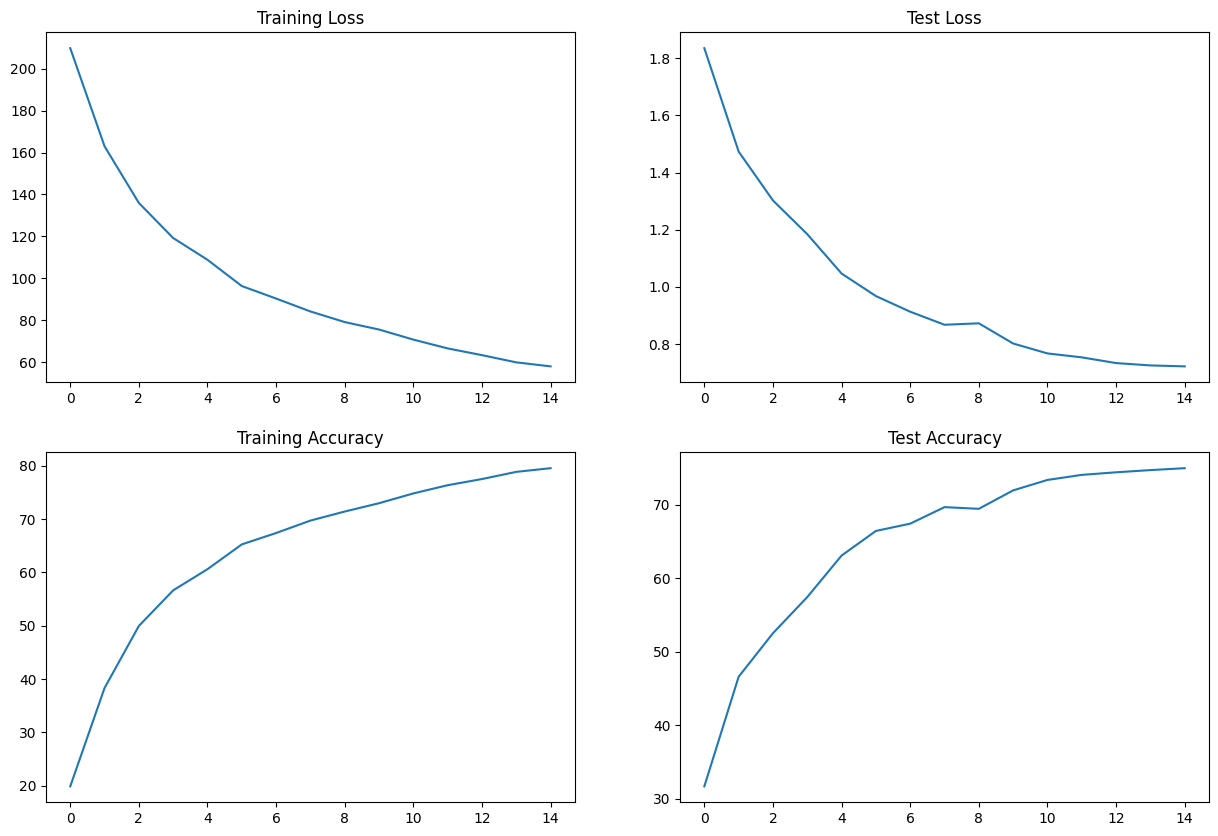

In [5]:
from model import draw_graphs
draw_graphs()

In [ ]:
from utils import get_incorrrect_predictions, plot_incorrect_predictions

Total Incorrect Predictions 2502


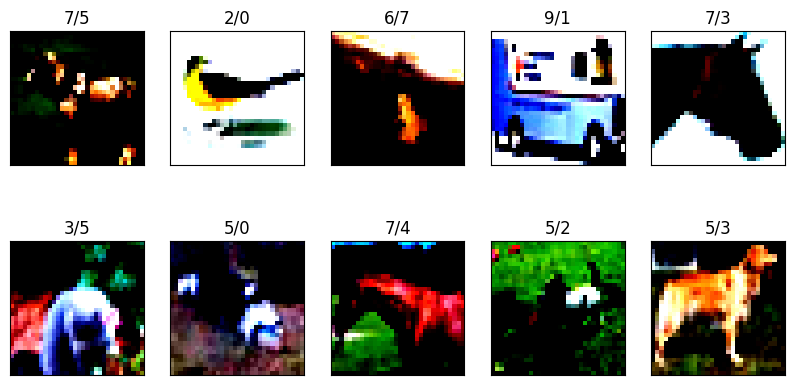

In [9]:
incorrect = get_incorrrect_predictions(model, test_loader, device)
plot_incorrect_predictions(incorrect, class_map)